In [1]:
import sys
sys.path.append('drive/My Drive/CCTech/Model/BoundariesBranch/Scripts/')
import numpy as np
import tensorflow
import tensorflow.keras
import paperLayersModel
from paperLayersModel import *
import setLearningRate
from setLearningRate import *
import dataGen
from dataGen import *
import random

In [3]:
train_input = np.load('drive/My Drive/CCTech/MasksGeneration/Masks/train_inputs.npy')
train_target = np.load('drive/My Drive/CCTech/MasksGeneration/Masks/train_bmasks.npy')
test_input = np.load('drive/My Drive/CCTech/MasksGeneration/Masks/test_inputs.npy')
test_target = np.load('drive/My Drive/CCTech/MasksGeneration/Masks/test_bmasks.npy')

In [4]:
train_generator = DataGenerator(train_input, train_target, batch_size=1, dim=(512,512), n_channels=3)
validation_generator = DataGenerator(test_input, test_target, batch_size=1, dim=(512,512), n_channels=3)

In [5]:
model = paperLayersModel()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [6]:
lr_scheduler = setLR()

In [7]:
model.fit_generator(generator=train_generator, epochs = 500, callbacks=[lr_scheduler], validation_data=validation_generator, steps_per_epoch=179, validation_steps=53)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
179/179 [==============================] - 14s 77ms/step - loss: 0.2268 - customMetric: 0.3978 - val_loss: 0.0775 - val_customMetric: 0.0500 - lr: 1.0000e-04
Epoch 2/500
179/179 [==============================] - 13s 74ms/step - loss: 0.0630 - customMetric: 0.0251 - val_loss: 0.0503 - val_customMetric: 0.0063 - lr: 1.0000e-04
Epoch 3/500
179/179 [==============================] - 13s 74ms/step - loss: 0.0443 - customMetric: 0.0102 - val_loss: 0.0437 - val_customMetric: 0.0070 - lr: 1.0000e-04
Epoch 4/500
179/179 [==============================] - 13s 74ms/step - loss: 0.0357 - customMetric: 0.0128 - val_loss: 0.0363 - val_customMetric: 0.0058 - lr: 1.0000e-04
Epoch 5/500
179/179 [==============================] - 13s 74ms/step - loss: 0.0326 - customMetric: 0.0282 - val_loss: 0.0358 - val_customMetric: 0.0775 - lr: 1.0000e-04
Epoch 6/500
179/179 [==============================] - 13s 74ms/step - los

KeyboardInterrupt: ignored

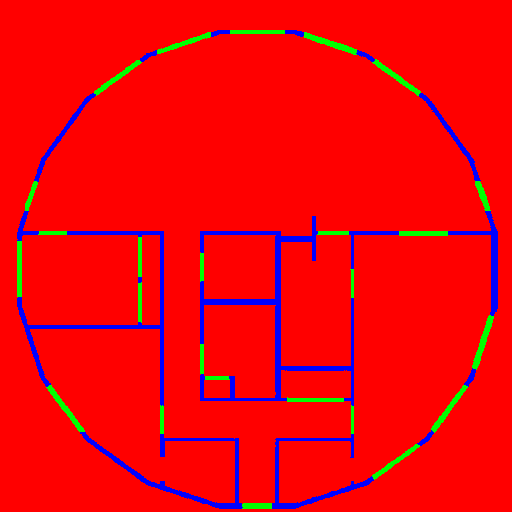

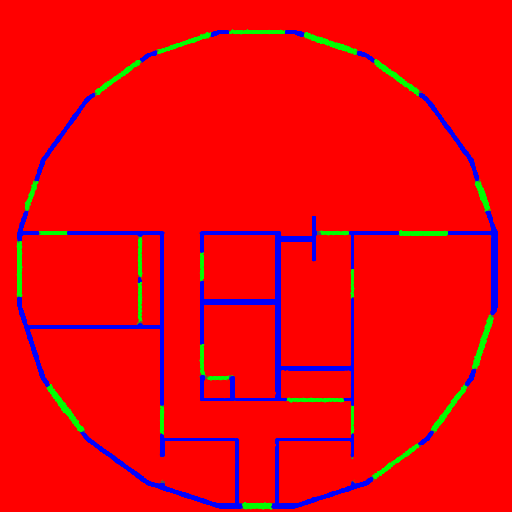

In [8]:
y = model.predict(train_input[1])
display(tensorflow.keras.preprocessing.image.array_to_img(tensorflow.reshape(train_target[1],(512,512,3))))
display(tensorflow.keras.preprocessing.image.array_to_img(y[0]))

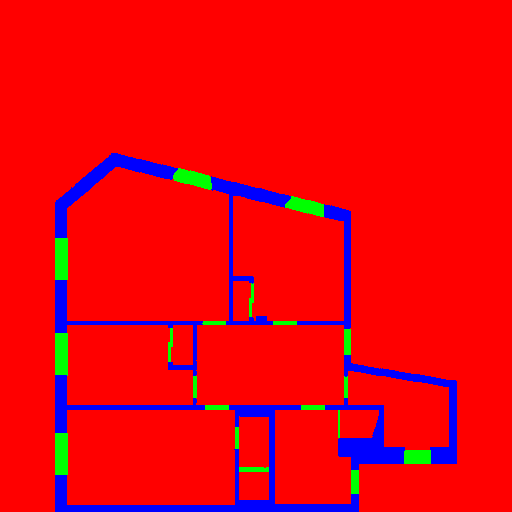

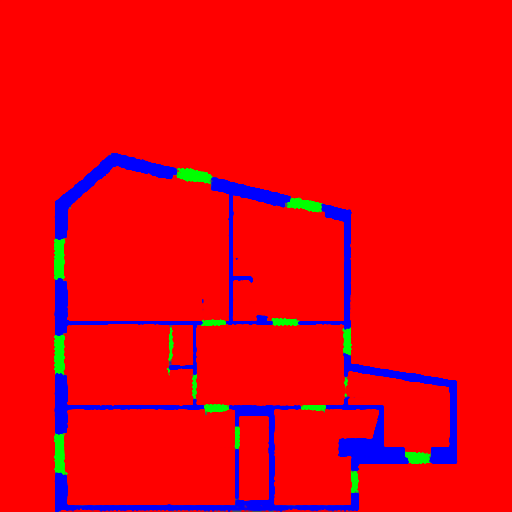

In [11]:
y = model.predict(test_input[33])
display(tensorflow.keras.preprocessing.image.array_to_img(tensorflow.reshape(test_target[33],(512,512,3))))
display(tensorflow.keras.preprocessing.image.array_to_img(y[0]))

In [12]:
model.save_weights("drive/My Drive/CCTech/Model/BoundariesBranch/BoundaryWeights.h5")

In [15]:
y[0][:,:,0].shape

(512, 512)

In [17]:
import cv2
import matplotlib.pyplot as plt

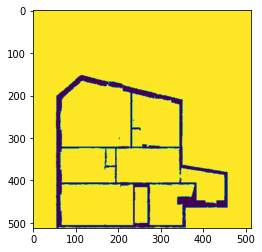

In [18]:
plt.imshow(y[0][:,:,0])

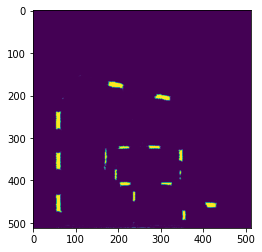

In [19]:
plt.imshow(y[0][:,:,1])

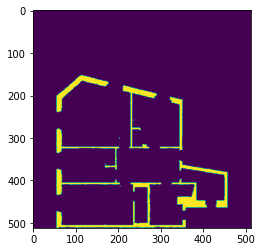

In [20]:
plt.imshow(y[0][:,:,2])